In [ ]:
pip install scikit-fuzzy

In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wei=ctrl.Antecedent(np.arange(1,8,0.1),'wei')
wat=ctrl.Antecedent(np.arange(10,70,1),'wat')
cl=ctrl.Antecedent(np.arange(0,100,0.1),'cl')
time=ctrl.Consequent(np.arange(10,100,10),'time')


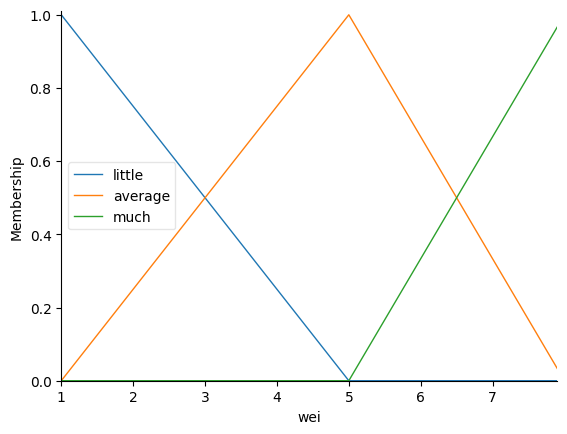

In [30]:
wei['little']=fuzz.trimf(wei.universe,[1,1,5])
wei['average']=fuzz.trimf(wei.universe,[1,5,8])
wei['much']=fuzz.trimf(wei.universe,[5,8,8])
wei.view()

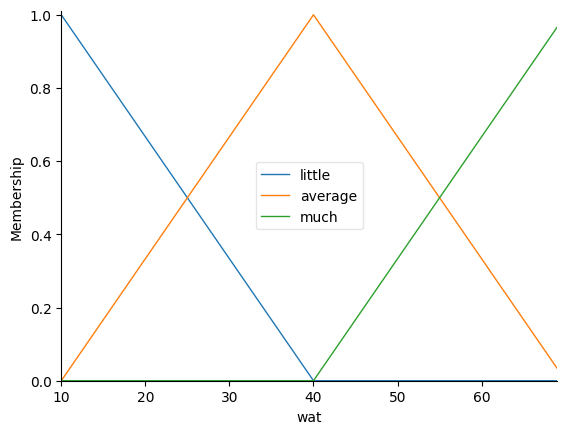

In [31]:
wat['little']=fuzz.trimf(wat.universe,[10,10,40])
wat['average']=fuzz.trimf(wat.universe,[10,40,70])
wat['much']=fuzz.trimf(wat.universe,[40,70,70])
wat.view()

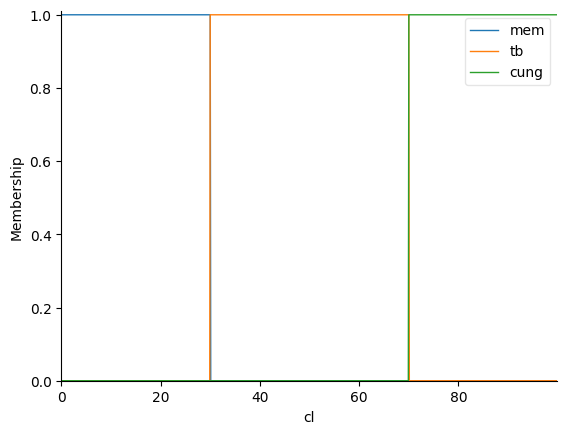

In [32]:
cl['mem']=fuzz.trapmf(cl.universe,[0,0,30,30])
cl['tb']=fuzz.trapmf(cl.universe,[30,30,70,70])
cl['cung']=fuzz.trapmf(cl.universe,[70,70,100,100])
cl.view()

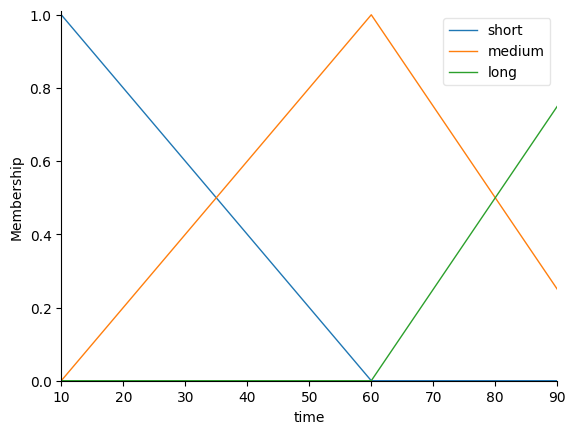

In [33]:
time['short']=fuzz.trimf(time.universe,[10,10,60])
time['medium']=fuzz.trimf(time.universe,[10,60,100])
time['long']=fuzz.trimf(time.universe,[60,100,100])
time.view()

In [34]:
Rule1 = ctrl.Rule(wei['little']&wat['little']&cl['mem'], time['short'])
Rule2 = ctrl.Rule(wei['little']&wat['little']&cl['tb'], time['short'])
Rule3 = ctrl.Rule(wei['little']&wat['little']&cl['cung'], time['medium'])
Rule4 = ctrl.Rule(wei['little']&wat['average']&cl['mem'], time['short'])
Rule5 = ctrl.Rule(wei['little']&wat['much']&cl['mem'], time['medium'])
Rule6 = ctrl.Rule(wei['average']&wat['little']&cl['mem'], time['short'])
Rule7 = ctrl.Rule(wei['much']&wat['little']&cl['mem'], time['medium'])
Rule8 = ctrl.Rule(wei['average']&wat['average']&cl['tb'], time['medium'])
Rule9 = ctrl.Rule(wei['average']&wat['average']&cl['mem'], time['medium'])
Rule10 = ctrl.Rule(wei['average']&wat['average']&cl['cung'], time['long'])
Rule11 = ctrl.Rule(wei['average']&wat['little']&cl['tb'], time['short'])
Rule12 = ctrl.Rule(wei['average']&wat['much']&cl['tb'], time['medium'])
Rule13 = ctrl.Rule(wei['little']&wat['average']&cl['tb'], time['medium'])
Rule14 = ctrl.Rule(wei['much']&wat['average']&cl['tb'], time['medium'])
Rule15 = ctrl.Rule(wei['much']&wat['much']&cl['cung'], time['long'])
Rule16 = ctrl.Rule(wei['much']&wat['much']&cl['tb'], time['long'])
Rule17 = ctrl.Rule(wei['much']&wat['much']&cl['mem'], time['medium'])
Rule18 = ctrl.Rule(wei['much']&wat['little']&cl['cung'], time['medium'])
Rule19 = ctrl.Rule(wei['much']&wat['average']&cl['cung'], time['long'])
Rule20 = ctrl.Rule(wei['little']&wat['much']&cl['cung'], time['medium'])
Rule21 = ctrl.Rule(wei['average']&wat['much']&cl['cung'], time['long'])
Rule22 = ctrl.Rule(wei['little']&wat['average']&cl['cung'], time['medium'])
Rule23 = ctrl.Rule(wei['little']&wat['much']&cl['tb'], time['medium'])
Rule24 = ctrl.Rule(wei['average']&wat['little']&cl['cung'], time['medium'])
Rule25 = ctrl.Rule(wei['much']&wat['little']&cl['tb'], time['medium'])
Rule26 = ctrl.Rule(wei['much']&wat['average']&cl['mem'], time['medium'])
Rule27 = ctrl.Rule(wei['average']&wat['much']&cl['mem'], time['medium'])

huongdi value: 55.61904761904761


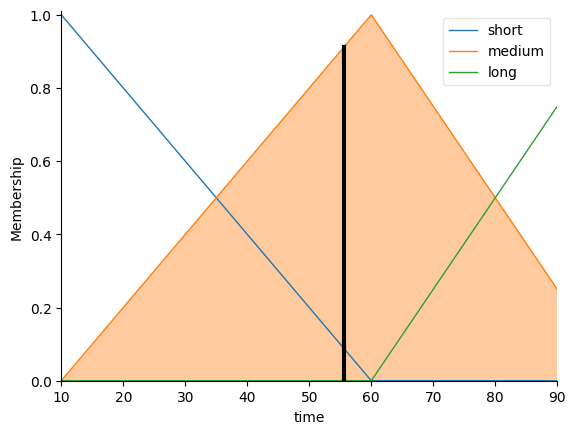

In [36]:
timeOn_ctrl=ctrl.ControlSystem([Rule1,Rule2,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8,Rule9,Rule10,Rule11,Rule12,Rule13,Rule14,Rule15,Rule16,Rule17,Rule18,Rule19,Rule20,Rule21,Rule22,Rule23,Rule24,Rule25,Rule26,Rule27])
timeOn=ctrl.ControlSystemSimulation(timeOn_ctrl)
timeOn.input['wei']=5
timeOn.input['wat']=40
timeOn.input['cl']=40
timeOn.compute()
print('huongdi value:',timeOn.output['time'])
time.view(sim=timeOn)
